In [1]:
##for TXLA

from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene

def TXLAfigure(monthyear):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + monthyear + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + monthyear + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    
    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                width=1500, height=750,
                area_extent=extent, units='degrees')    
        
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    #loop
    for swat in swats:
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])

        #extract projection and lon lat from products
        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
        lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

        #true color
        ax1 = plt.subplot(projection=crs)
        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)
        
        #title & save
        ax1.set_title('MODISA_Mdelta_%s' % new_scn.start_time.isoformat())
        fig.savefig('/home/hboi-ouri/Projects/NASA_Project/outputs/DailyImages/TXLA/MODISA_Mdelta_%s_rgb.jpeg' % new_scn.start_time.isoformat())


/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

KeyboardInterrupt: 

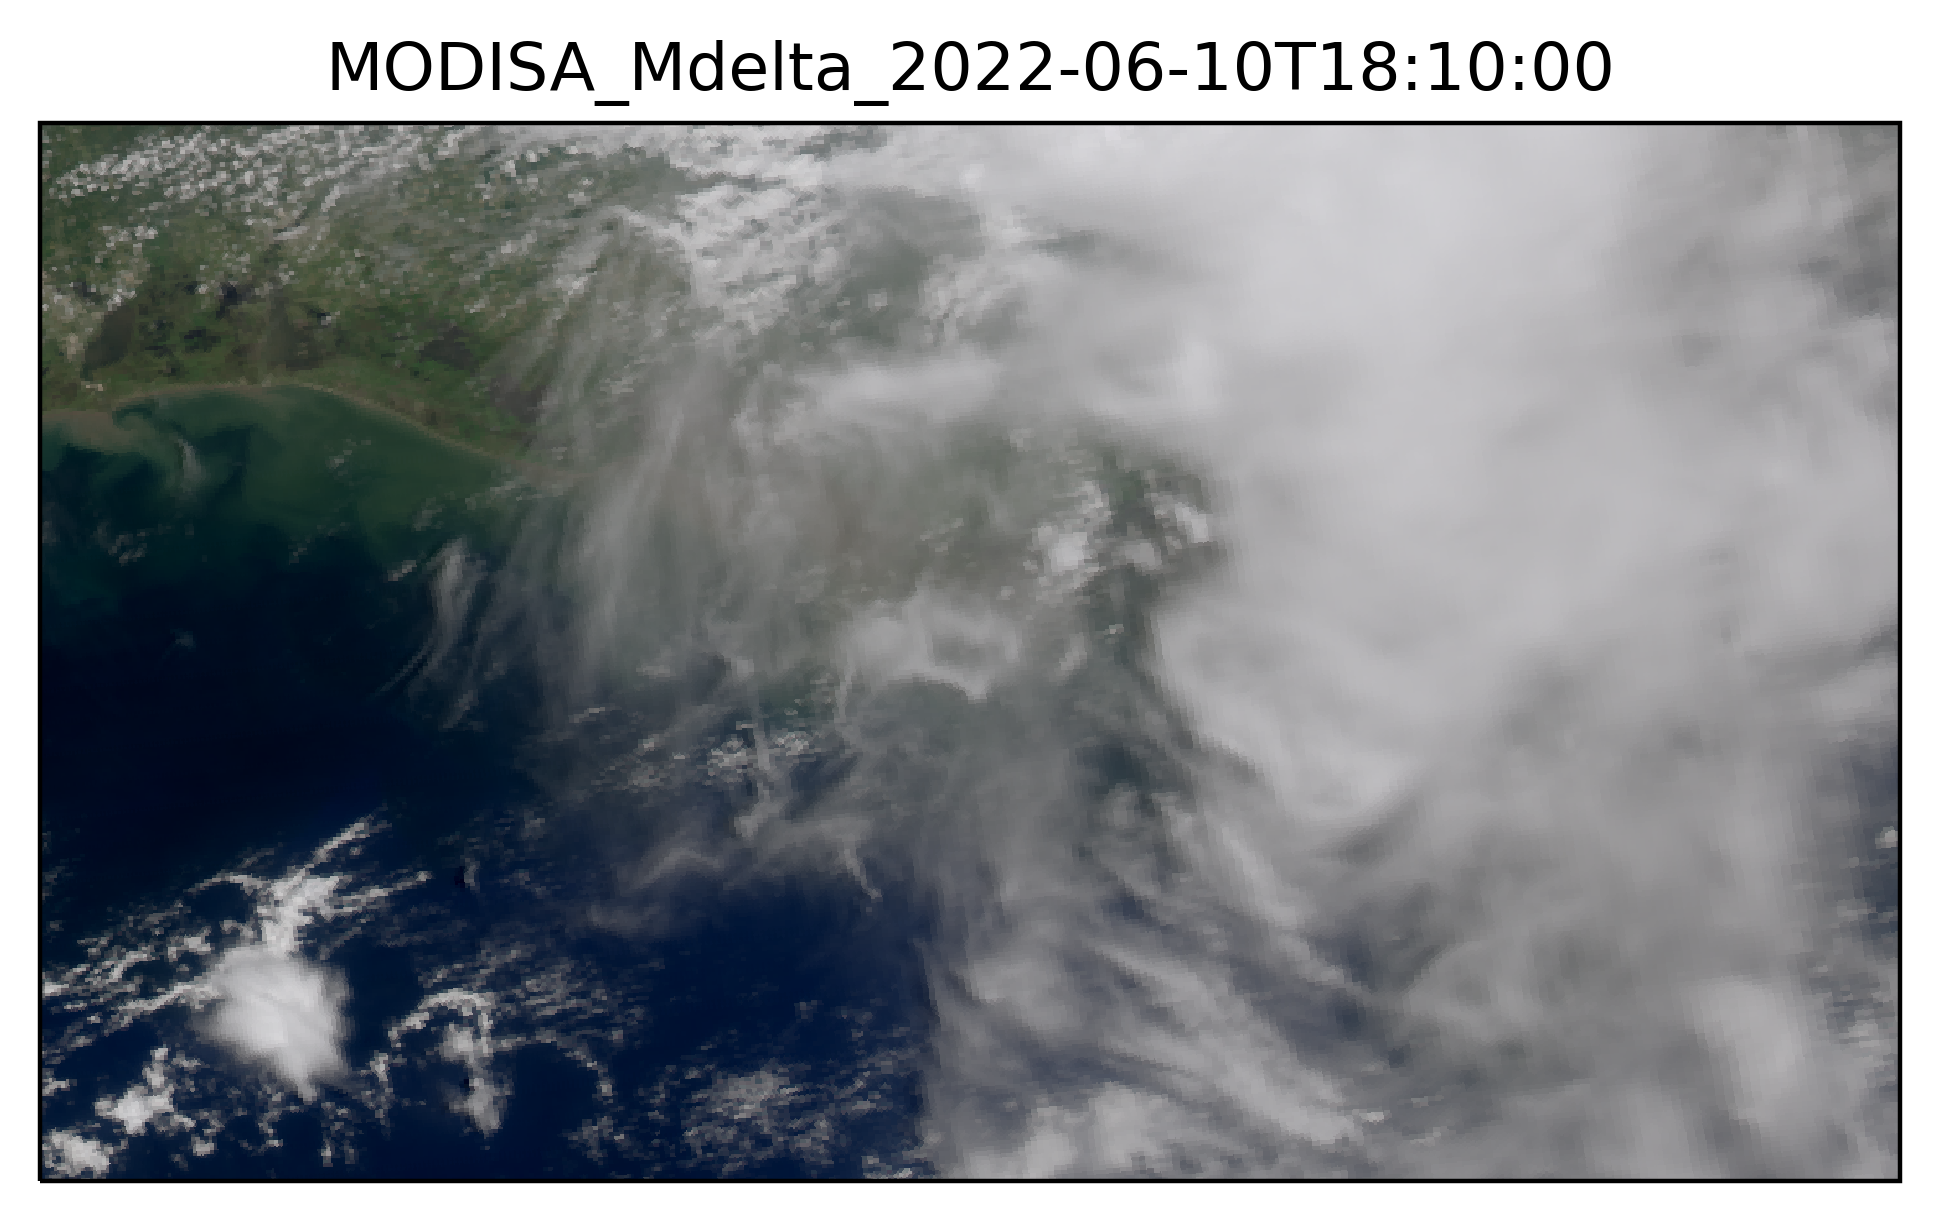

In [2]:
TXLAfigure('June2022')


In [2]:
## For FLBay

from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from satpy import MultiScene
from satpy.multiscene import timeseries

def FLBayfigure(monthyear):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/FLBayDailies/' + monthyear + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/FLBayDailies/' + monthyear + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    

    #area in the figure
    extent = [-82.0, 24.4, -80.0, 25.6]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -81.0, 'lat_0': 25.0, 'lat_1': 25.0, 'lat_2': 25.0},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    #loop
    for swat in swats:
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])

        #extract projection and lon lat from products
        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
        lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

        #left true color
        ax1 = plt.subplot(projection=crs)
        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)

        #title & save
        ax1.set_title('MODISA_FLBay_%s' % new_scn.start_time.isoformat())
        fig.savefig('/home/hboi-ouri/Projects/NASA_Project/outputs/DailyImages/FLBay/FLBay%s_rgb.png' % new_scn.start_time.isoformat())



/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeW

/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-o

/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in arccos
  return func(*(_execute_task(a, cache) for a in args))
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/anaconda3/envs/satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:485: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255

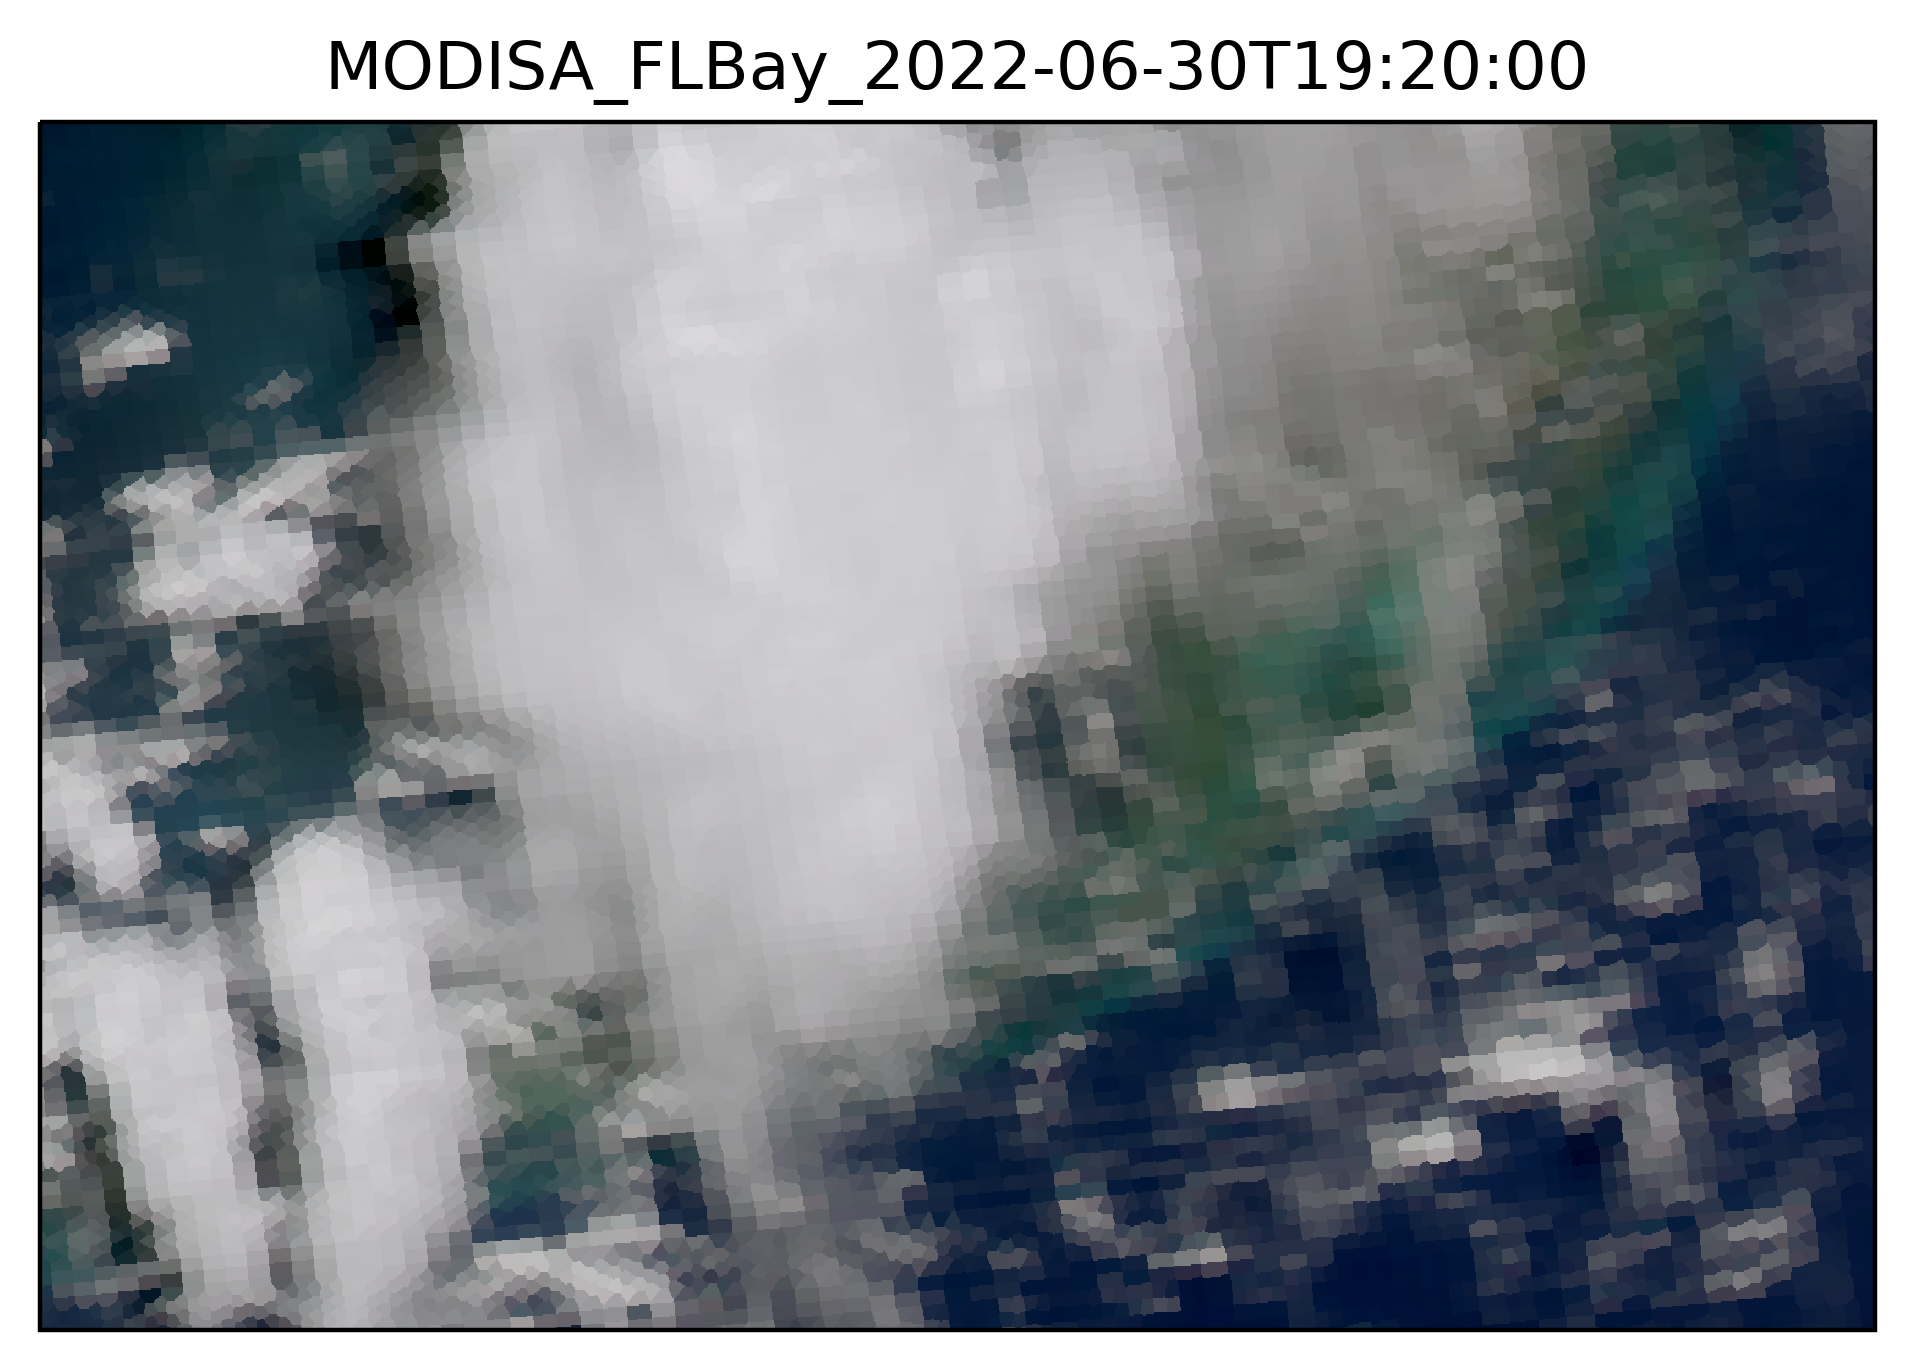

In [11]:
FLBayfigure('June2022')

In [ ]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from satpy import MultiScene
from satpy.multiscene import timeseries

def TXLAfigure(monthyear):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + monthyear + '/MYD021KM.'

    filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + monthyear + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                width=1500, height=750,
                area_extent=extent, units='degrees')    
        
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    for swat in swats:
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        new_scn = scn.resample(my_area)

        rgb = get_enhanced_image(new_scn['true_color'])

        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
        lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

        ax1 = plt.subplot(projection=crs)
        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)
        
        ax1.set_title('MODISA_Mdelta_%s' % new_scn.start_time.isoformat())
        fig.savefig('/home/hboi-ouri/Projects/NASA_Project/outputs/DailyImages/TXLA/MODISA_Mdelta_%s_rgb.png' % new_scn.start_time.isoformat())
